In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("./train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![jupyter](./features-meaning.png)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

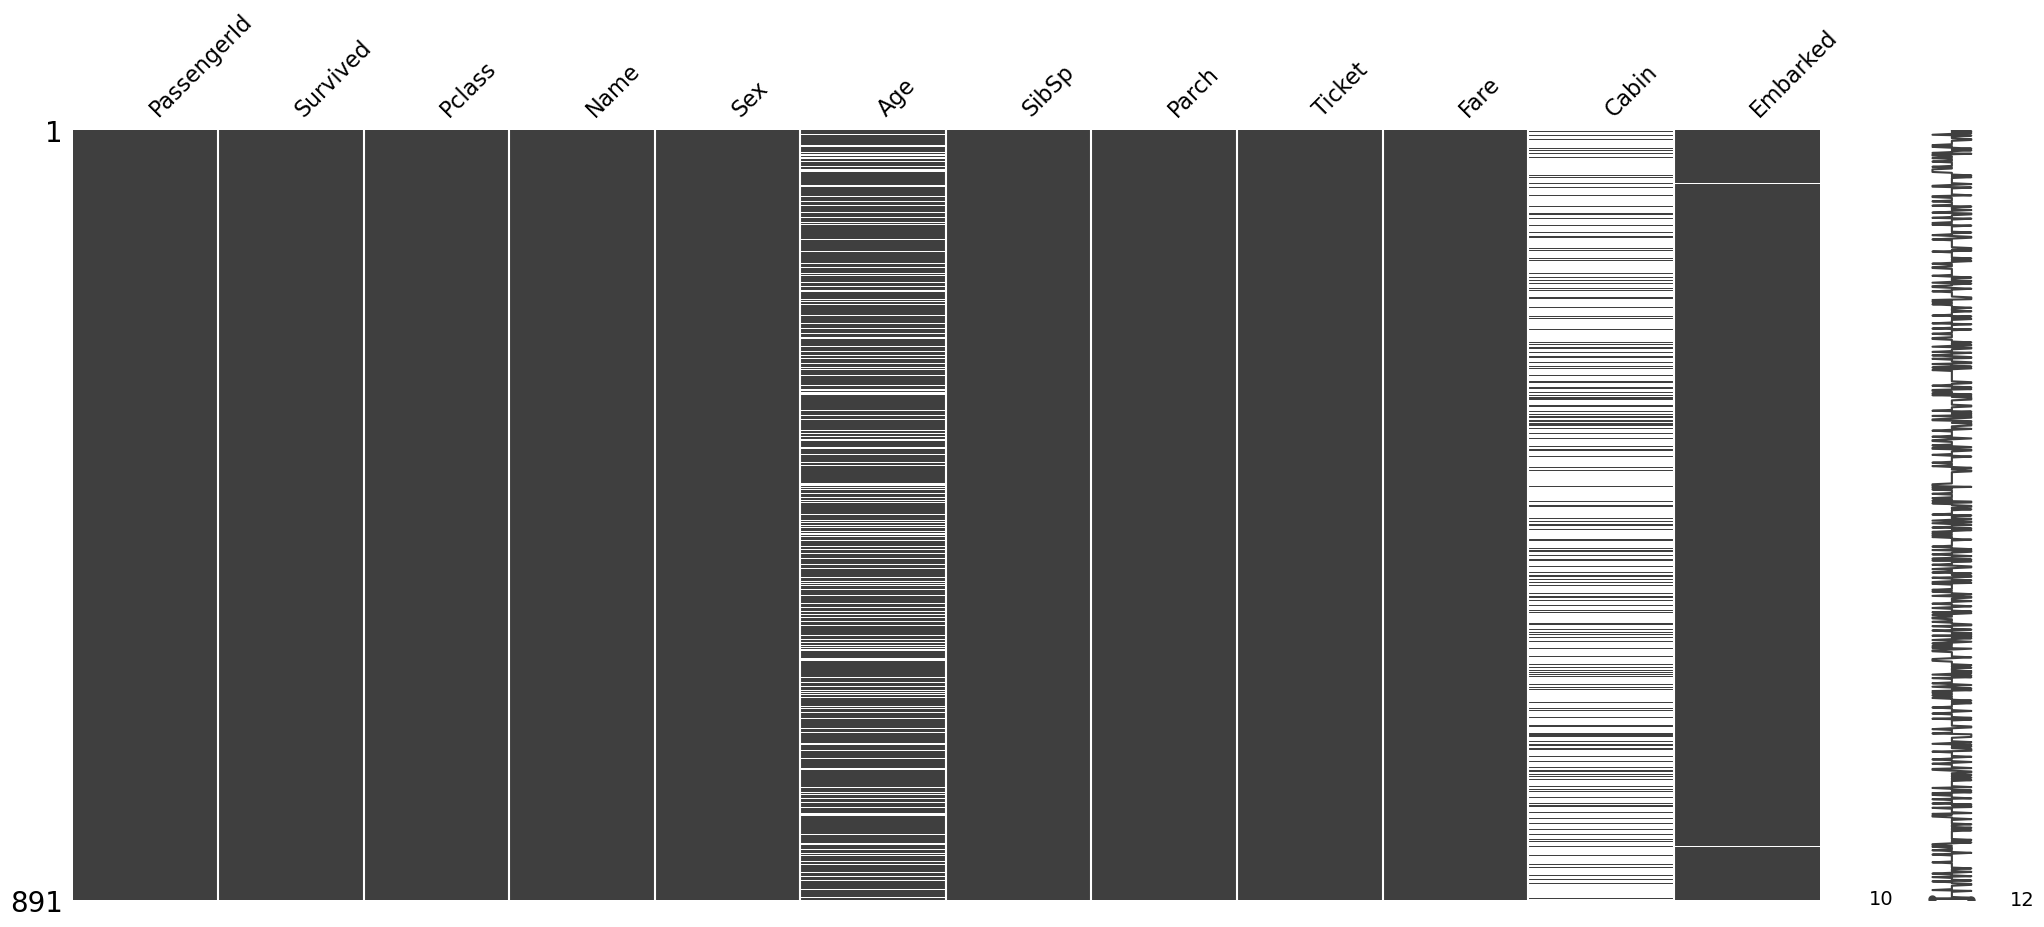

In [ ]:

import missingno as msno
%matplotlib inline
msno.matrix(train_data)

In [ ]:
train_data.drop(columns=['Cabin'], inplace=True) 
train_data['Age'].fillna(train_data.Age.median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True) 
train_data.dropna(inplace=True) 

<Axes: >

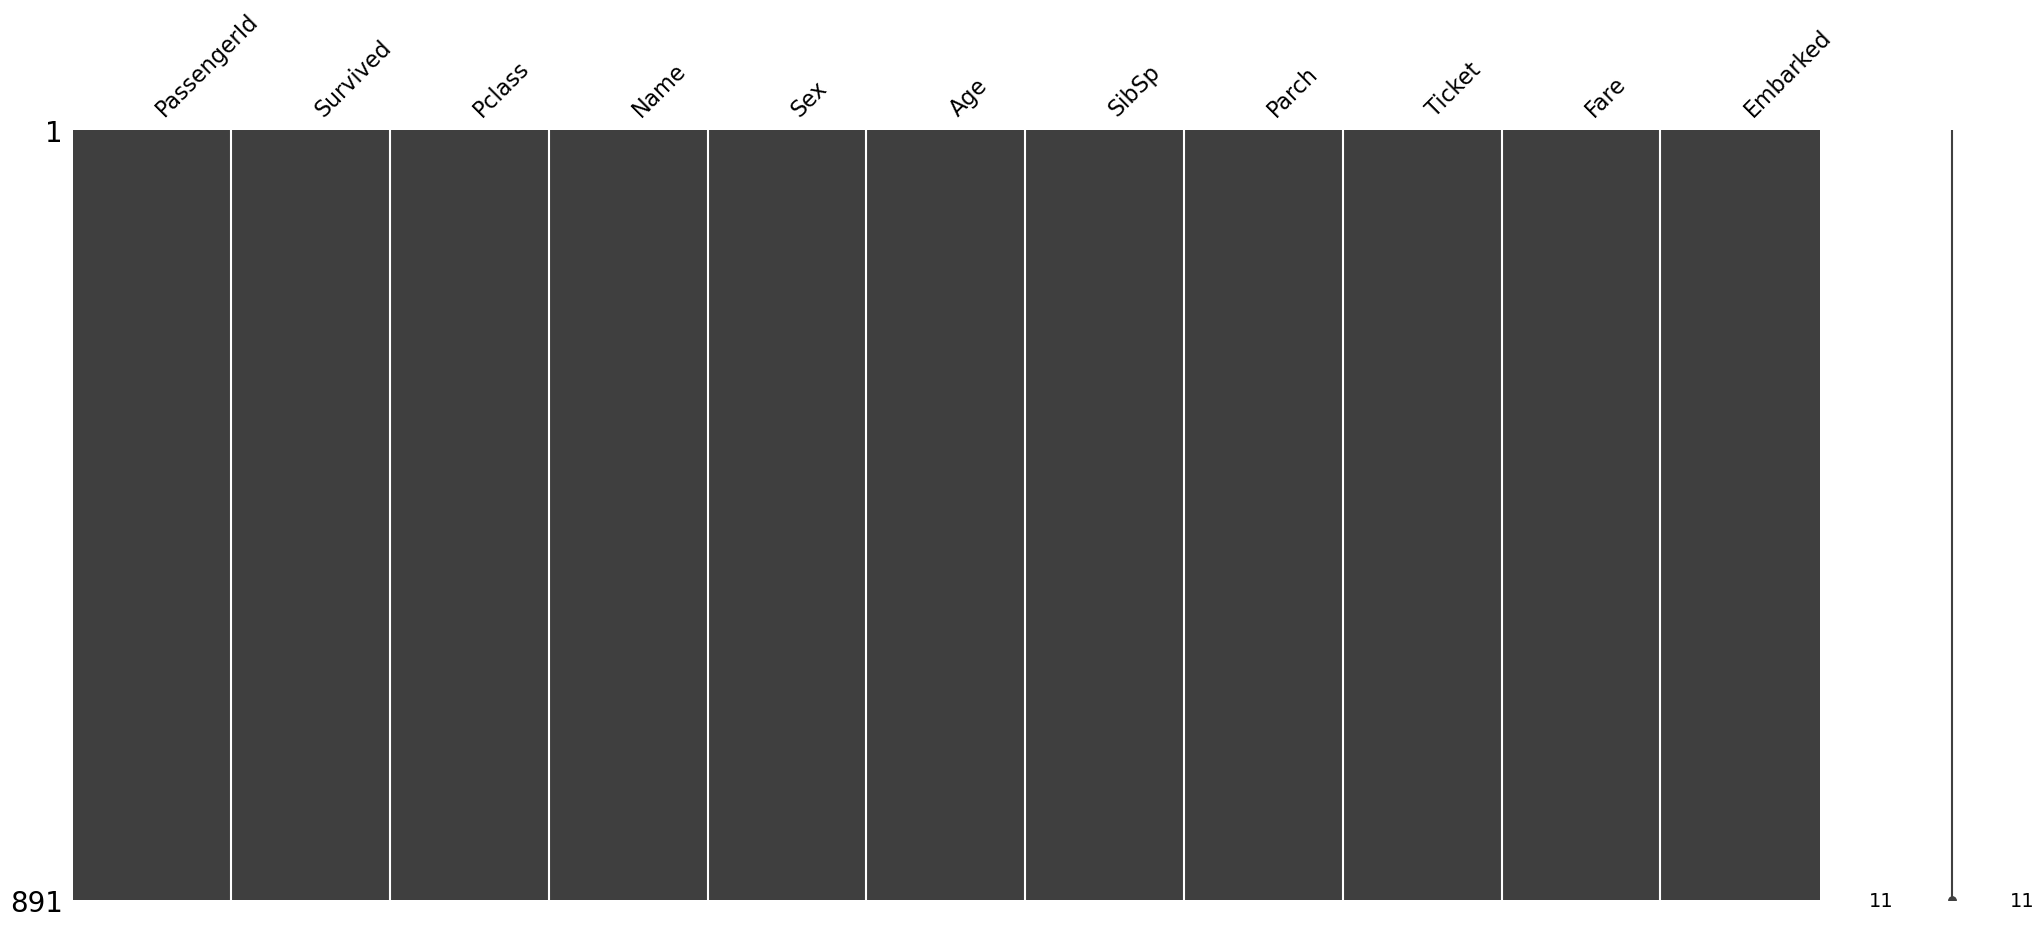

In [ ]:

import missingno as msno
%matplotlib inline
msno.matrix(train_data)

In [ ]:

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1}) 

In [ ]:

scaler = StandardScaler()
numeric_features = ['Age', 'Fare'] 
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])

In [ ]:

categorical_features = ['Sex', 'Embarked']
df_encoded = pd.get_dummies(train_data[categorical_features], drop_first=True)

df_processed = pd.concat([train_data.drop(columns=categorical_features + ['Name', 'Ticket', 'PassengerId', 'Survived']), df_encoded], axis=1)


In [23]:
df_processed.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,3,-0.565736,1,0,-0.502445,0,False,True
1,1,0.663861,1,0,0.786845,1,False,False
2,3,-0.258337,0,0,-0.488854,1,False,True
3,1,0.433312,1,0,0.420730,1,False,True
4,3,0.433312,0,0,-0.486337,0,False,True


In [ ]:

category_distribution = train_data['Survived'].value_counts()  
  
print(category_distribution)

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
X = df_processed
y = train_data['Survived']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [32]:
print(X_res,y_res)

      Pclass       Age  SibSp  Parch      Fare  Sex  Embarked_Q  Embarked_S
0          3 -0.565736      1      0 -0.502445    0       False        True
1          1  0.663861      1      0  0.786845    1       False       False
2          3 -0.258337      0      0 -0.488854    1       False        True
3          1  0.433312      1      0  0.420730    1       False        True
4          3  0.433312      0      0 -0.486337    0       False        True
...      ...       ...    ...    ...       ...  ...         ...         ...
1093       2  0.998816      1      2 -0.132306    1       False        True
1094       1 -0.129973      0      0  0.594543    1       False       False
1095       3  0.118381      2      0 -0.327175    1       False        True
1096       2 -0.123675      0      0 -0.399141    1       False        True
1097       2 -1.740621      0      1 -0.032357    1       False        True

[1098 rows x 8 columns] 0       0
1       1
2       1
3       1
4       0
       ..
109

In [ ]:
df_res = pd.DataFrame(X_res, columns=X.columns)
df_res['Survived'] = y_res 

print(df_res.head(5)) 

   Pclass       Age  SibSp  Parch      Fare  Sex  Embarked_Q  Embarked_S  \
0       3 -0.565736      1      0 -0.502445    0       False        True   
1       1  0.663861      1      0  0.786845    1       False       False   
2       3 -0.258337      0      0 -0.488854    1       False        True   
3       1  0.433312      1      0  0.420730    1       False        True   
4       3  0.433312      0      0 -0.486337    0       False        True   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


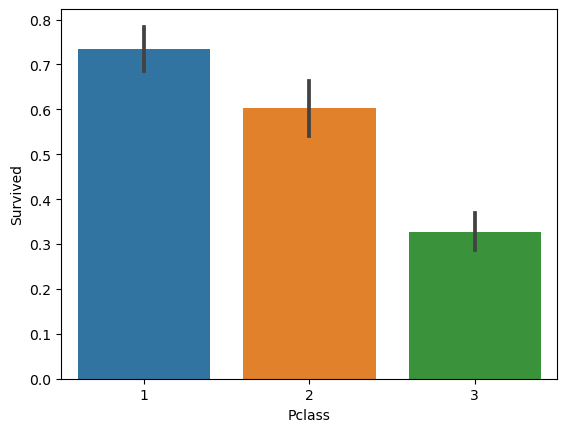

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df_res); 

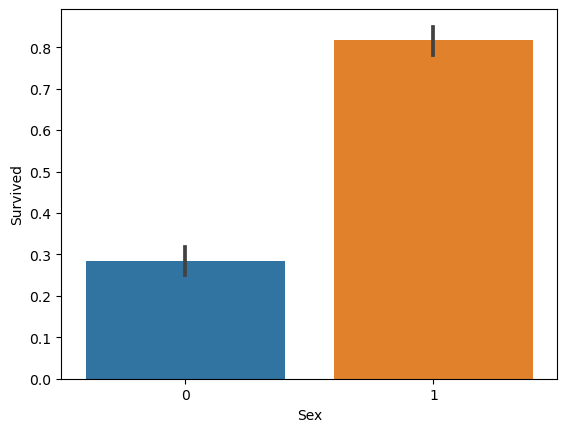

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df_res); 

In [ ]:
csv_filename = 'Processed_Titanic_Data.csv'  
df_res.to_csv(csv_filename, index=False) 
print(f'Data has been saved to {csv_filename}')

Data has been saved to Processed_Titanic_Data.csv


In [ ]:

from sdv.datasets.local import load_csvs
datasets = load_csvs(
    folder_name='./',
    read_csv_parameters={
        'skipinitialspace': True,
        'encoding': 'utf-8'
    })
data = datasets['Processed_Titanic_Data']

In [77]:
#Auto Detect Metadata
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=data,
    table_name='titanic_dataset')
print(metadata)

{
    "tables": {
        "titanic_dataset": {
            "columns": {
                "Pclass": {
                    "sdtype": "categorical"
                },
                "Age": {
                    "sdtype": "numerical"
                },
                "SibSp": {
                    "sdtype": "categorical"
                },
                "Parch": {
                    "sdtype": "categorical"
                },
                "Fare": {
                    "sdtype": "numerical"
                },
                "Sex": {
                    "sdtype": "categorical"
                },
                "Embarked_Q": {
                    "sdtype": "categorical"
                },
                "Embarked_S": {
                    "sdtype": "categorical"
                },
                "Survived": {
                    "sdtype": "categorical"
                }
            }
        }
    },
    "relationships": [],
    "METADATA_SPEC_VERSION": "V1"
}


In [ ]:

from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=False,
    epochs=400,
    verbose=True
)

synthesizer.fit(data)

fig = synthesizer.get_loss_values_plot()
fig.show()

E:\qycache\anaconda\Lib\site-packages\sdv\single_table\base.py:105: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.

Gen. (-0.82) | Discrim. (-0.20): 100%|███████████████████████████████████████████████| 400/400 [00:51<00:00,  7.77it/s]


In [ ]:

synthetic_data = synthesizer.sample(num_rows=1000)

In [81]:
#diagnostic(ensure that the dataset you have created is valid)
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1285.59it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.30it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [82]:
#Check data quality
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████████████████████████████████████████████████| 9/9 [00:00<00:00, 562.47it/s]|
Column Shapes Score: 86.96%

(2/2) Evaluating Column Pair Trends: |███████████████████████████████████████████████| 36/36 [00:00<00:00, 155.22it/s]|
Column Pair Trends Score: 79.26%

Overall Score (Average): 83.11%



In [83]:
data_copy1 = data.copy()  
data_copy2 = data.copy()  
synthetic_copy1 = synthetic_data.copy() 
synthetic_copy2 = synthetic_data.copy() 

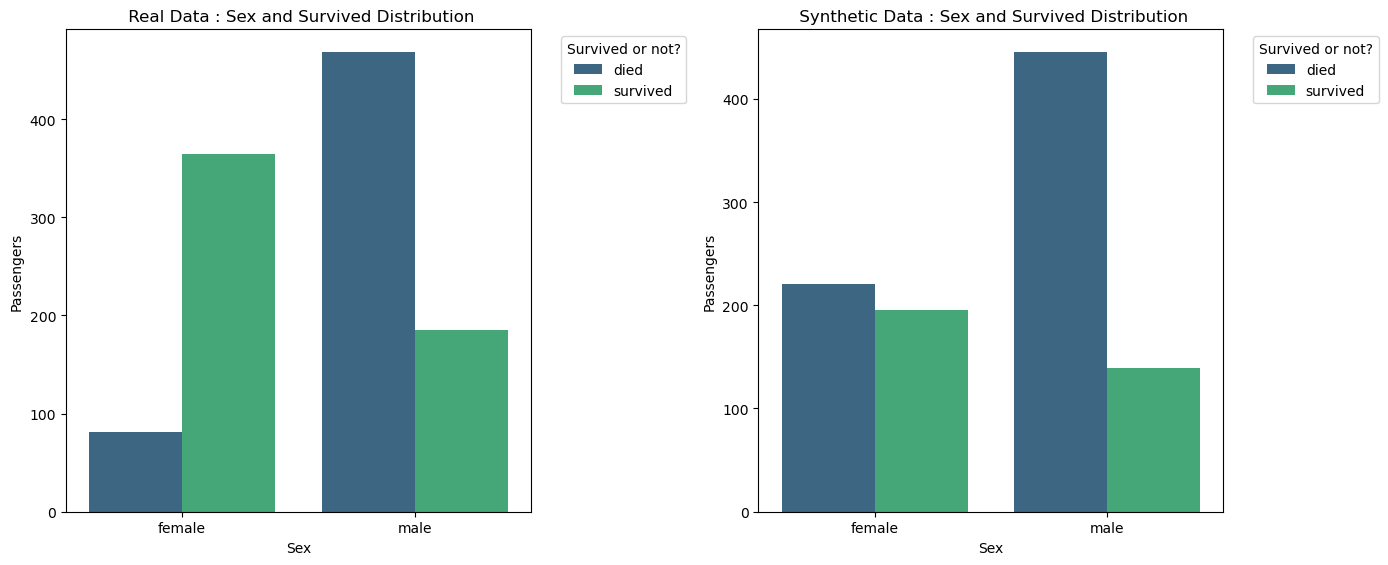

In [ ]:

sex_mapping = {0: 'male', 1: 'female'}  
survived_mapping = {0: 'died', 1: 'survived'}  
  
data_copy1['Sex'] = data_copy1['Sex'].map(sex_mapping)  
data_copy1['Survived'] = data_copy1['Survived'].map(survived_mapping)  
  
synthetic_copy1['Sex'] = synthetic_copy1['Sex'].map(sex_mapping)  
synthetic_copy1['Survived'] = synthetic_copy1['Survived'].map(survived_mapping)  

def plot_sex_survived_comparison(data, ax, title):  
    crosstab = pd.crosstab(data['Sex'], data['Survived'])  
    crosstab_long = crosstab.reset_index().melt(id_vars=['Sex'], var_name='Survived', value_name='count')  
      
    sns.barplot(x='Sex', y='count', hue='Survived', data=crosstab_long, ax=ax, palette='viridis')  
    ax.set_title(title)  
    ax.set_xlabel('Sex')  
    ax.set_ylabel('Passengers')  
    ax.legend(title='Survived or not?', bbox_to_anchor=(1.05, 1), loc='upper left')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  

plot_sex_survived_comparison(data_copy1, ax1, ' Real Data : Sex and Survived Distribution')  

plot_sex_survived_comparison(synthetic_copy1, ax2, ' Synthetic Data : Sex and Survived Distribution')  

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

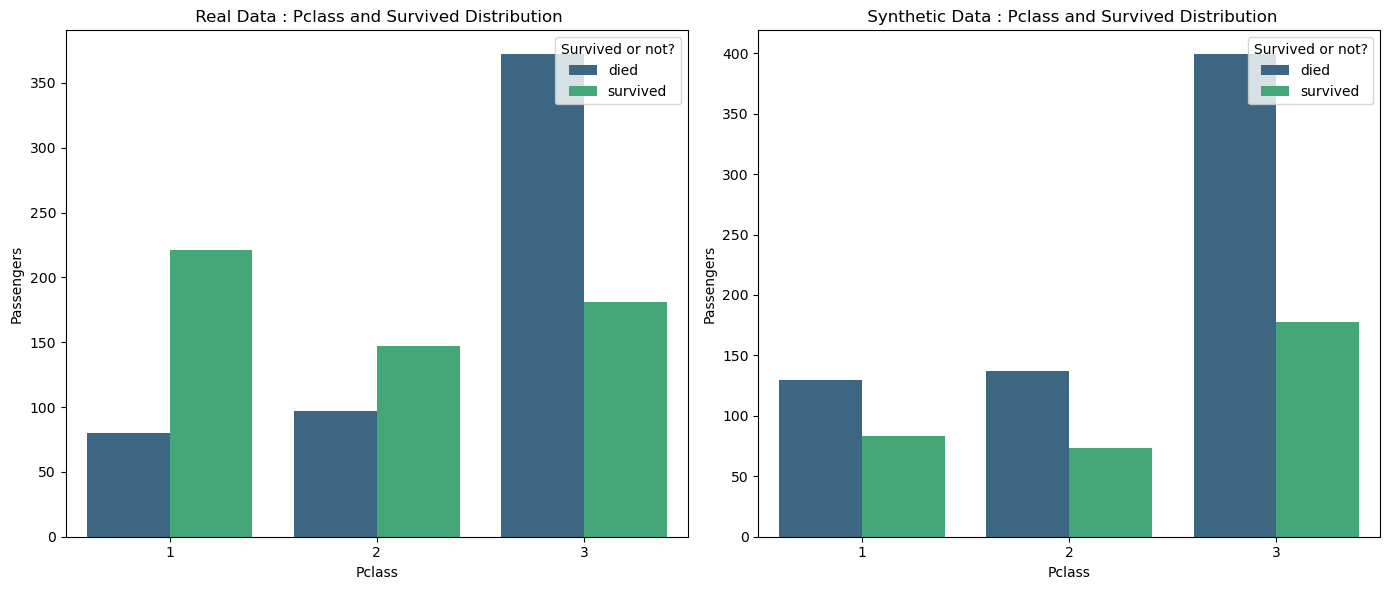

In [ ]:
  
survived_mapping = {0: 'died', 1: 'survived'}  

data_copy2['Survived'] = data_copy2['Survived'].map(survived_mapping)  
synthetic_copy2['Survived'] = synthetic_copy2['Survived'].map(survived_mapping)  

def plot_pclass_survived_comparison(data, ax, title):  
    crosstab = pd.crosstab(data['Pclass'], data['Survived'])  
    crosstab_long = crosstab.reset_index().melt(id_vars=['Pclass'], var_name='Survived', value_name='count')  
      
    sns.barplot(x='Pclass', y='count', hue='Survived', data=crosstab_long, ax=ax, palette='viridis')  
    ax.set_title(title)  
    ax.set_xlabel('Pclass')  
    ax.set_ylabel('Passengers')  
    ax.legend(title='Survived or not?', loc='upper right') 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  
    
plot_pclass_survived_comparison(data_copy2, ax1, ' Real Data : Pclass and Survived Distribution')  

plot_pclass_survived_comparison(synthetic_copy2, ax2, ' Synthetic Data : Pclass and Survived Distribution')  
  
plt.tight_layout() 
plt.show()

In [ ]:

correlation_matrix_real = data.corr()

print(correlation_matrix_real)

              Pclass       Age     SibSp     Parch      Fare       Sex  \
Pclass      1.000000 -0.350447  0.072086  0.016927 -0.567146 -0.150604   
Age        -0.350447  1.000000 -0.219420 -0.198616  0.129442 -0.037011   
SibSp       0.072086 -0.219420  1.000000  0.398231  0.135214  0.081520   
Parch       0.016927 -0.198616  0.398231  1.000000  0.179177  0.190653   
Fare       -0.567146  0.129442  0.135214  0.179177  1.000000  0.168973   
Sex        -0.150604 -0.037011  0.081520  0.190653  0.168973  1.000000   
Embarked_Q  0.229794 -0.021452 -0.030296 -0.087771 -0.121027  0.066897   
Embarked_S  0.065403 -0.028063  0.067809  0.091432 -0.158107 -0.115391   
Survived   -0.355088 -0.074628 -0.043150  0.068707  0.248567  0.524989   

            Embarked_Q  Embarked_S  Survived  
Pclass        0.229794    0.065403 -0.355088  
Age          -0.021452   -0.028063 -0.074628  
SibSp        -0.030296    0.067809 -0.043150  
Parch        -0.087771    0.091432  0.068707  
Fare         -0.121027  

In [ ]:

correlation_matrix_fake = synthetic_data.corr()

print(correlation_matrix_fake)

              Pclass       Age     SibSp     Parch      Fare       Sex  \
Pclass      1.000000 -0.066399 -0.042571 -0.003780 -0.035838 -0.023579   
Age        -0.066399  1.000000  0.068728  0.018951 -0.058982  0.124545   
SibSp      -0.042571  0.068728  1.000000  0.066783  0.003084  0.083392   
Parch      -0.003780  0.018951  0.066783  1.000000  0.057977  0.019912   
Fare       -0.035838 -0.058982  0.003084  0.057977  1.000000  0.025208   
Sex        -0.023579  0.124545  0.083392  0.019912  0.025208  1.000000   
Embarked_Q  0.023736  0.086353  0.009846 -0.099584 -0.039066  0.013737   
Embarked_S  0.045290 -0.003555  0.082388  0.151765  0.041717  0.076676   
Survived   -0.069491  0.054641  0.063896  0.093829  0.020726  0.241134   

            Embarked_Q  Embarked_S  Survived  
Pclass        0.023736    0.045290 -0.069491  
Age           0.086353   -0.003555  0.054641  
SibSp         0.009846    0.082388  0.063896  
Parch        -0.099584    0.151765  0.093829  
Fare         -0.039066  

In [ ]:

from sklearn.feature_selection import mutual_info_classif

y = data['Survived'] 
X = data.drop(columns=['Survived']) 

mi = mutual_info_classif(X, y)

print(f"Mutual Information between Sex and Survived: {mi[X.columns.get_loc('Sex')]}")
print(f"Mutual Information between Pclass and Survived: {mi[X.columns.get_loc('Pclass')]}")

In [ ]:
y = synthetic_data['Survived'] 
X = synthetic_data.drop(columns=['Survived']) 
mi = mutual_info_classif(X, y)
print(f"Mutual Information between Sex and Survived: {mi[X.columns.get_loc('Sex')]}")
print(f"Mutual Information between Pclass and Survived: {mi[X.columns.get_loc('Pclass')]}")

In [ ]:

from scipy.stats import chi2_contingency   
crosstab = pd.crosstab(data['Survived'], data['Sex'])  

chi2, p, dof, expected = chi2_contingency(crosstab)  
  
print(f"Chi2 Statistic: {chi2}")  
print(f"P-value: {p}")  
print(f"Degrees of Freedom: {dof}")  
print("Expected Frequencies Table:")  
print(expected)  
crosstab_pclass = pd.crosstab(data['Survived'], data['Pclass'])  
chi2_pclass, p_pclass, dof_pclass, expected_pclass = chi2_contingency(crosstab_pclass)  
print(f"\nChi2 Statistic for Pclass: {chi2_pclass}")  
print(f"P-value for Pclass: {p_pclass}")  
print(f"Degrees of Freedom for Pclass: {dof_pclass}")  
print("Expected Frequencies Table for Pclass:")  
print(expected_pclass)

Chi2 Statistic: 300.4881600908512
P-value: 2.578802081645957e-67
Degrees of Freedom: 1
Expected Frequencies Table:
[[326.5 222.5]
 [326.5 222.5]]

Chi2 Statistic for Pclass: 142.2649941158992
P-value for Pclass: 1.2809997462995218e-31
Degrees of Freedom for Pclass: 2
Expected Frequencies Table for Pclass:
[[150.5 122.  276.5]
 [150.5 122.  276.5]]


In [ ]:

from scipy.stats import chi2_contingency   
crosstab = pd.crosstab(synthetic_data['Survived'], synthetic_data['Sex'])  
  

chi2, p, dof, expected = chi2_contingency(crosstab)  
  

print(f"Chi2 Statistic: {chi2}")  
print(f"P-value: {p}")  
print(f"Degrees of Freedom: {dof}")  
print("Expected Frequencies Table:")  
print(expected)  

crosstab_pclass = pd.crosstab(synthetic_data['Survived'], synthetic_data['Pclass'])  
chi2_pclass, p_pclass, dof_pclass, expected_pclass = chi2_contingency(crosstab_pclass)  

print(f"\nChi2 Statistic for Pclass: {chi2_pclass}")  
print(f"P-value for Pclass: {p_pclass}")  
print(f"Degrees of Freedom for Pclass: {dof_pclass}")  
print("Expected Frequencies Table for Pclass:")  
print(expected_pclass)

Chi2 Statistic: 57.11301204774875
P-value: 4.1147422043686534e-14
Degrees of Freedom: 1
Expected Frequencies Table:
[[388.944 277.056]
 [195.056 138.944]]

Chi2 Statistic for Pclass: 4.830542815183296
P-value for Pclass: 0.08934308723871875
Degrees of Freedom for Pclass: 2
Expected Frequencies Table for Pclass:
[[141.858 139.86  384.282]
 [ 71.142  70.14  192.718]]


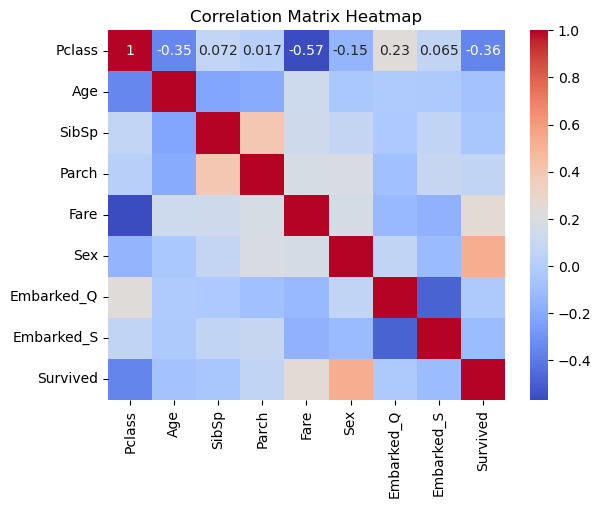

In [ ]:

import seaborn as sns

sns.heatmap(correlation_matrix_real, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

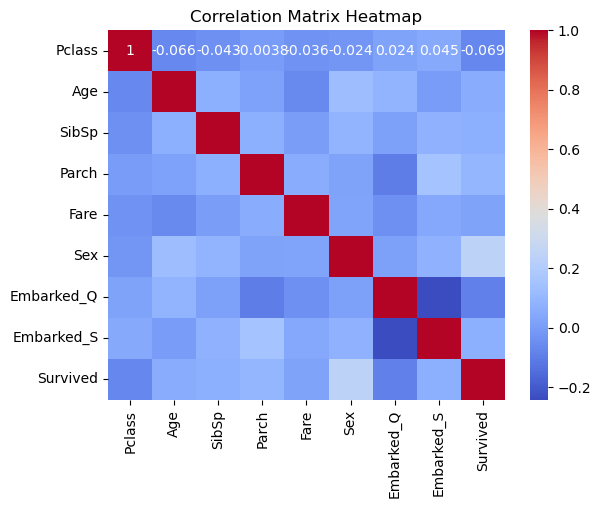

In [ ]:

import seaborn as sns

sns.heatmap(correlation_matrix_fake, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()